## ANALIZA PODATKOV - KNJIGE


Najprej je potrebno naložiti podatke z interneta. Ker smo že naložili in obdelali podatke lokalno, tega koraka ne bomo ponovno izvajali.

# TABELA S PODATKI

Za prikaz vhodnih podatkov bomo uporabili knjižnico pandas. Prikazali bomo le nekaj vrstic, da dobimo občutek o tem, kako izgleda naša tabela s podatki.

In [74]:
import pandas as pd # naložimo paket pandas za prikaz podatkov

# izpišemo le 10 vrstic 
pd.set_option('display.max_rows', 10)

# ukaz za stil risanja
%matplotlib inline

# Naložimo razpredelnico, s katero bomo delali.
KNJIGE = pd.read_csv('koncni_podatki/podatki_o_knjigi.csv', encoding='utf-8')

In [75]:
KNJIGE

,naslov,avtor,dolzina,zvrst,o_pisatelju
0,"Ne povej, kaj si sanjala - zvočna knjiga na US...",Feri Lainšček,131.0,roman,"Pisatelj, pesnik, dramatik in scenarist Feri L..."
1,Terenske raziskave ukrajinskega seksa,Oksana Zabužko,168.0,roman,Oksana Zabužko (1960) je ugledna ukrajinska fi...
2,Mitrejin koder,Miha Remec,204.0,roman,"Miha Remec (1922, Ptuj) je pisec znanstvene fa..."
3,Moje leto v Nikogaršnjem zalivu,Peter Handke,NaN,roman,Peter Handke (1942) je eden največjih živečih ...
4,Dežela ZOO,Dušan Čater,200.0,roman,"Du&scaron;an Čater (1968) je pisatelj, prevaja..."
...,...,...,...,...,...
329,Veronikin prt,Josip Osti,116.0,poezija,"Josip Osti (1945-;2021) je bil pesnik, pisatel..."
330,"Oče, tvoje oči gorijo",Ivo Svetina,116.0,poezija,"Ivo Svetina (1948, Ljubljana) je eden pomembne..."
331,Pod kamni plešem,Jure Vuga,77.0,poezija,"Jure Vuga (1983, Koper) je profesor umetnostne..."
332,Fusnote,Andrej Brvar,132.0,poezija,"Andrej Brvar (1945) je slovenski lektor, uredn..."


# PROUČEVANJE PODATKOV

Najprej bomo uvozili knjižnico za risanje grafov.

In [12]:
import matplotlib.pyplot as plt

Za začetek si poglejmo, kateri avtor ima v prodaji največ knjig.

avtor
Marcel Proust       8
Lawrence Durrell    7
Marjan Tomšič       6
Aleš Šteger         5
Milan Jesih         5
Name: count, dtype: int64


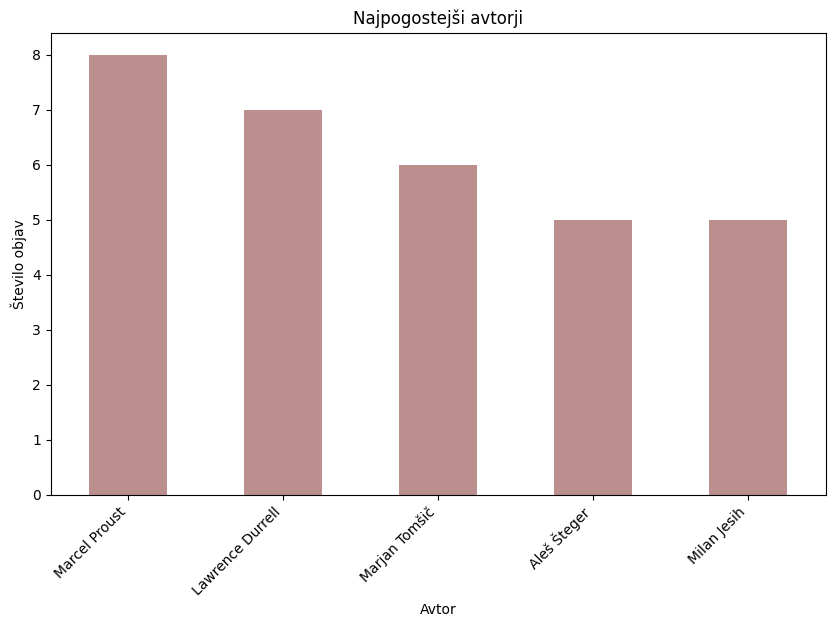

In [139]:
# izberemo 5 najpogostejših avtorjev
najpogosteje = KNJIGE['avtor'].value_counts().nlargest(5)
print(najpogosteje)

# narišemo histogram
plt.figure(figsize=(10, 6))
najpogosteje.plot(kind='bar', color='rosybrown')
plt.title('Najpogostejši avtorji')
plt.xlabel('Avtor')
plt.ylabel('Število objav')
plt.xticks(rotation=45, ha='right')
plt.show()

Poglejmo si povprečno dolžino knjig glede na zvrst. Rezultat bomo prikazali s tortnim diagramom.

            dolzina
zvrst              
poezija  239.807143
roman    427.220430


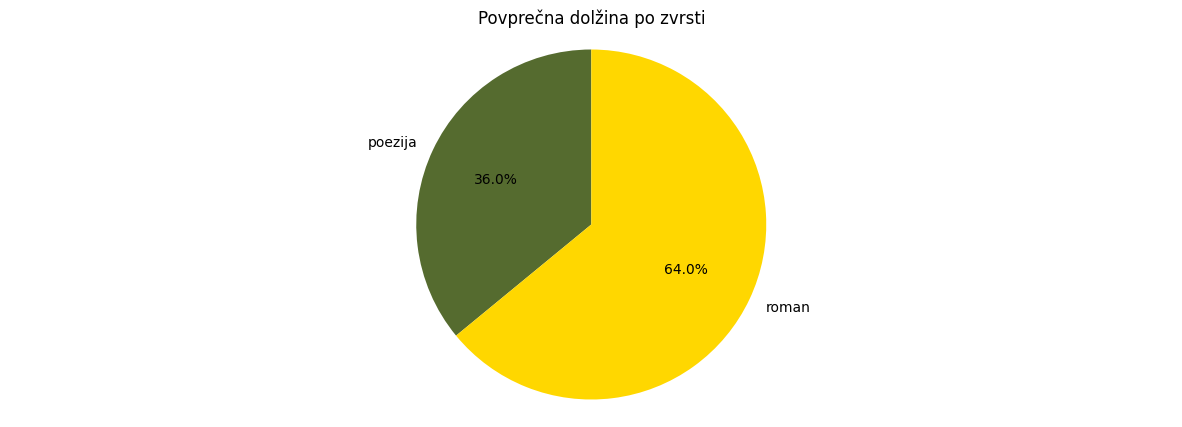

In [140]:
# V novo spremenljivko shranimo povprečno dolžino knjige glede na zvrst.
povprecna_dolzina_po_zvrsti = KNJIGE[['dolzina', 'zvrst']].groupby(by = 'zvrst').mean()
print(povprecna_dolzina_po_zvrsti)

# Narišemo tortni diagram.
fig, ax1 = plt.subplots(1, figsize=(15, 5))

povprecna_dolzina_po_zvrsti['dolzina'].plot.pie(
    autopct='%1.1f%%', startangle=90, ax=ax1, colors = ['darkolivegreen', 'gold'])
ax1.set_title('Povprečna dolžina po zvrsti')
ax1.axis('equal') 
ax1.set_ylabel('')  

plt.show()

Poglejmo si še, katera beseda se največkrat uporabi v naslovu.

[(13, 'pesmi'), (9, 'zbrane'), (4, 'brez'), (4, 'knjiga'), (4, 'poezije'), (3, 'antologija'), (3, 'lune'), (3, 'polne')]


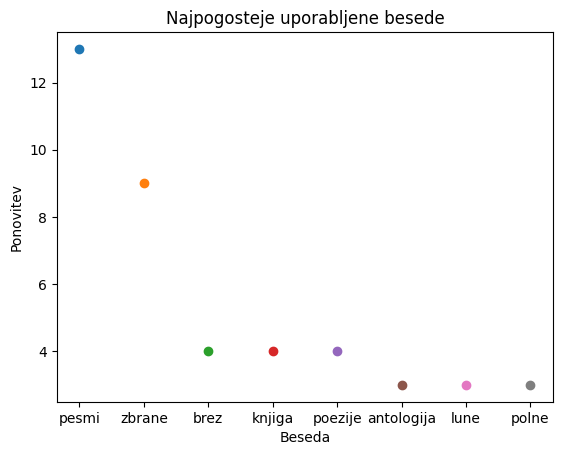

In [141]:
import re

# Ustvarimo prazen slovar za shranjevanje besed in njeno frekvenco v naslovih.
slov = {}
for index, row in KNJIGE.iterrows():    
    # Iz podatkov izbrišemo ločila.
    naslov = re.sub(r'[?.!-]+', '', row["naslov"])

    for beseda in naslov.split(" "):
        # Z ukazom .split() smo besede ločili med seboj, sedaj pa še poskrbimo, da so vse napisane enako.
        beseda = beseda.lower()
        # Izločimo besede, ki so dolge manj ali enako kot 3 črke.
        if len(beseda) <= 3:
            continue

        # Če beseda že obstaja v slovarju, povečamo njeno vrednost za 1; sicer jo dodamo v slovar s frekvenco 1.
        if beseda in slov:
            slov[beseda] += 1
        else:
            slov[beseda] = 1

# Podatke uredimo padajoče po frekvenci pojavitev.
ponovitve = [(-n, beseda) for beseda, n in slov.items()]
ponovitve.sort()
rezultat = [(-ponovitev, b) for ponovitev, b in ponovitve[:8]]

print(rezultat)

# Narišemo točkovni graf.
for pon, bes in rezultat:
    plt.scatter(bes, pon)
    plt.title("Najpogosteje uporabljene besede")
    plt.xlabel("Beseda")
    plt.ylabel("Ponovitev")
    
plt.show()


Ugotovimo, da se največkrat pojavi beseda 'pesmi'.

Še ena zanimiva tema je leto rojstva pisateljev. Poglejmo si to podrobneje.

[(10, '1973'), (9, '1871'), (9, '1939'), (9, '1963'), (9, '1967'), (8, '1954'), (7, '1912'), (7, '1945')]


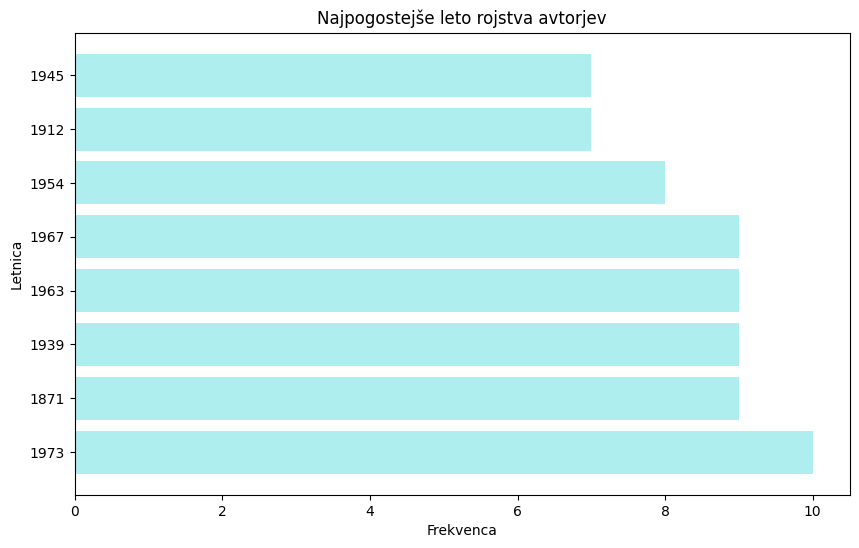

In [142]:
import re

# Ustvarimo prazen slovar za shranjevanje letnic in njihove frekvence pojavitve.
slov = {}
for index, row in KNJIGE.iterrows():
    # S pomočjo regularnih izrazov poiščemo prvo letnico (letnica rojstva), ki se pojavi v opisu.
    letnica_vzorec = r'\((\d{4})[^\)]*\)'
    opis = row["o_pisatelju"]
    # Preverimo ali je opis res niz.
    if isinstance(opis, str): 
        letnica = re.search(letnica_vzorec, opis)
        
        # Če letnica že obstaja v slovarju, povečamo njeno vrednost za 1; sicer jo dodamo v slovar s frekvenco 1.
        if letnica:
            let = letnica.group(1) 
            if let in slov:
                slov[let] += 1
            else:
                slov[let] = 1

# V seznam parov (ponovitev, letnica) shranimo rezultate in jih uredimo v padajočem vrstnem redu.
ponovitve = [(-n, letnica) for letnica, n in slov.items()]
ponovitve.sort()
rezultat = [(abs(ponovitev), letnica) for ponovitev, letnica in ponovitve[:8]]

print(rezultat)

# En seznam ločimo na dva seznama, za lažjo analizo.
letnice, frekvence = zip(*rezultat)

# Narišemo vodoravni stolpični graf.
plt.figure(figsize=(10, 6))
plt.barh(frekvence, letnice, color='paleturquoise')  # Uporabi barh za horizontalni graf
plt.title('Najpogostejše leto rojstva avtorjev')
plt.xlabel('Frekvenca')
plt.ylabel('Letnica')
plt.show()
